In [1]:
# Should be run with environment having TF >= 1.3.0
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Linear Model

In [5]:
np.random.seed(1)
n, p = 100000, 200
X = np.random.randn(n, p).astype(np.float32)
b_act = np.random.randn(p).astype(np.float32)
y = (np.dot(X, b_act) + .01*np.random.randn(n)).astype(np.float32) 
X.shape, b_act.shape, y.shape

((100000, 200), (200,), (100000,))

In [6]:
from ml.scipy import optimize
param_names = ['X{}'.format(i) for i in range(p)]
constraints = optimize.ScipyConstraints()
constraints.add_gtez('X0')
constraints.add_gte('X1', 'X8')
constraints.add_gte('X2', 'X9')
constraints.add_gte('X3', 'X10')
constraints.add_gte('X4', 'X11')
constraints.add_gte('X5', 'X12')
constraints.add_gte('X6', 'X13')
#constraints.add_gtev('X1', 5.0)

model = (
    optimize.ScipyLinearModelBuilder()
    .set_objective(optimize.OBJECTIVE_MSE)
#     .add_intercept()\
    .add_linear_params(param_names)
    .build()
)


In [7]:
%%time
est = optimize.ScipyRegressor(model, constraints=constraints, analytical_gradients=True)
est.fit(X, y)

CPU times: user 1.4 s, sys: 1.04 s, total: 2.44 s
Wall time: 2.14 s


In [6]:
%%time
est_nograd = optimize.ScipyRegressor(model, constraints=constraints, analytical_gradients=False)
est_nograd.fit(X, y)

CPU times: user 41.9 s, sys: 18.2 s, total: 1min
Wall time: 47.8 s


In [19]:
print(est.get_fit_summary())

Optimization converged successfully:

    Success: True
    Status Code: 0
    Message: Optimization terminated successfully.
    Number of iterations: 4
    Number of function evaluations: 7
    Objective Function Value: 4.125919961228505
    


In [7]:
print(est_nograd.get_fit_summary())

Optimization converged successfully:

    Success: True
    Status Code: 0
    Message: Optimization terminated successfully.
    Number of iterations: 8
    Number of function evaluations: 1218
    Objective Function Value: 0.0035156487352487635
    


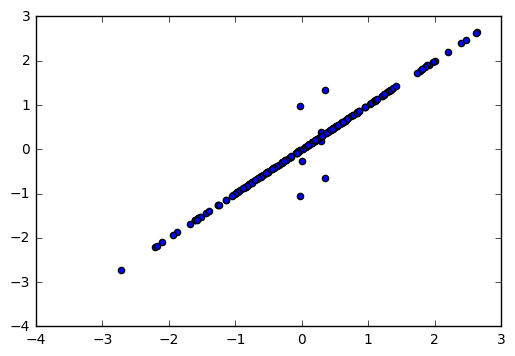

In [20]:
plt.scatter(est.fit_.x, b_act)

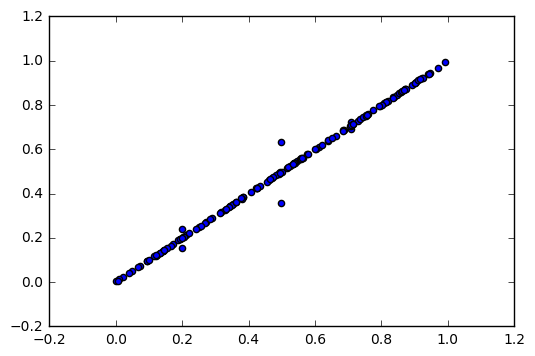

In [9]:
assert np.allclose(est.fit_.x, est_nograd.fit_.x)
plt.scatter(est_nograd.fit_.x, est.fit_.x)

In [21]:
from tensorflow.contrib.opt import ScipyOptimizerInterface

tf.reset_default_graph()

b = tf.Variable(tf.zeros(p, dtype=tf.float64), 'parameters')

# Make vector norm as small as possible.
y_diff = y - tf.squeeze(tf.matmul(tf.cast(X, dtype=tf.float64), tf.reshape(b, [-1, 1])))
loss = tf.reduce_mean(tf.square(tf.cast(y_diff, dtype=tf.float64)))

print(y_diff)
print(loss)
# Ensure the vector's y component is = 1.
#equalities = [b[0] - 1.]
equalities = []
# Ensure the vector's x component is >= 1.
#inequalities = [b[2] - b[1]]
inequalities = [
    b[0],
    b[1] - b[8],
    b[2] - b[9],
    b[3] - b[10],
    b[4] - b[11],
    b[5] - b[12],
    b[6] - b[13]
]

# Our default SciPy optimization algorithm, L-BFGS-B, does not support
# general constraints. Thus we use SLSQP instead.
optimizer = ScipyOptimizerInterface(
    loss, equalities=equalities, inequalities=inequalities, method='SLSQP', options=dict(maxiter=1000))

init = tf.global_variables_initializer()
    
with tf.Session() as session:
    session.run(init)
    
    optimizer.minimize(session)
    b_est = session.run(b)
    final_loss = session.run(loss)


Tensor("sub:0", shape=(1000000,), dtype=float64)
Tensor("Mean:0", shape=(), dtype=float64)
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 4.125920
  Number of iterations: 4
  Number of functions evaluations: 7


In [23]:
assert np.isclose(final_loss, est.fit_.fun)

In [16]:
#plt.scatter(b_est, b_act)

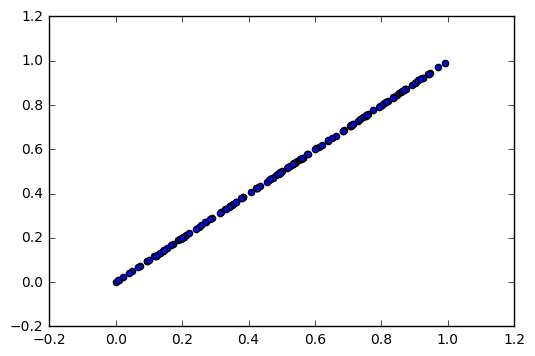

In [25]:
assert np.allclose(est.fit_.x, b_est)
plt.scatter(est.fit_.x, b_est)

## Logistic Model

In [2]:
from py_utils.math import sigmoid
np.random.seed(1)
n, p = 10000, 20
X = np.random.randn(n, p).astype(np.float32)
b_act = np.random.randn(p).astype(np.float32)
y = np.where(sigmoid(np.dot(X, b_act) + .01*np.random.randn(n)) >= .5, 1, 0).astype(np.int32) 
X.shape, b_act.shape, y.shape

((10000, 20), (20,), (10000,))

In [3]:
from ml.scipy import optimize
param_names = ['X{}'.format(i) for i in range(p)]
constraints = optimize.ScipyConstraints()
constraints.add_gtez('X0')
constraints.add_gte('X1', 'X8')
constraints.add_gte('X2', 'X9')
constraints.add_gte('X3', 'X10')
constraints.add_gte('X4', 'X11')
constraints.add_gte('X5', 'X12')
constraints.add_gte('X6', 'X13')
#constraints.add_gtev('X1', 5.0)

model = (
    optimize.ScipyLinearModelBuilder()
    .set_objective(optimize.OBJECTIVE_MLL)
#     .add_intercept()\
    .add_linear_params(param_names)
    .build()
)


In [4]:
%%time
est = optimize.ScipyRegressor(model, constraints=constraints, analytical_gradients=True)
est.fit(X, y)

CPU times: user 26.9 ms, sys: 3.99 ms, total: 30.9 ms
Wall time: 27 ms


In [8]:
%%time
est_nograd = optimize.ScipyRegressor(model, constraints=constraints, analytical_gradients=False)
est_nograd.fit(X, y)

CPU times: user 201 ms, sys: 18.2 ms, total: 219 ms
Wall time: 202 ms


In [9]:
print(est.get_fit_summary())

Optimization converged successfully:

    Success: True
    Status Code: 0
    Message: Optimization terminated successfully.
    Number of iterations: 13
    Number of function evaluations: 13
    Objective Function Value: 0.3018872454741569
    


In [10]:
print(est_nograd.get_fit_summary())

Optimization converged successfully:

    Success: True
    Status Code: 0
    Message: Optimization terminated successfully.
    Number of iterations: 13
    Number of function evaluations: 286
    Objective Function Value: 0.30188724547691526
    


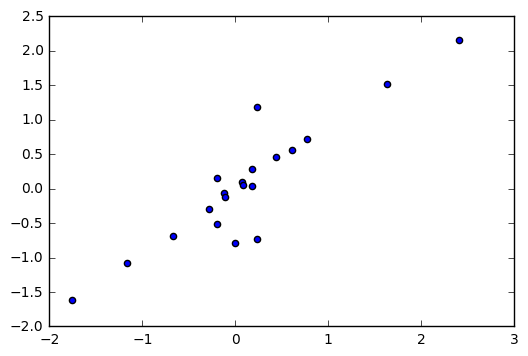

In [11]:
plt.scatter(est.fit_.x, b_act)

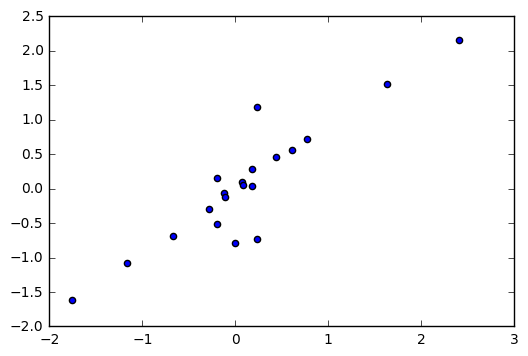

In [12]:
plt.scatter(est_nograd.fit_.x, b_act)

In [14]:
from tensorflow.contrib.opt import ScipyOptimizerInterface

tf.reset_default_graph()

b = tf.Variable(tf.zeros(p, dtype=tf.float64), 'parameters')

# Make vector norm as small as possible.
y_proba = tf.nn.sigmoid(tf.squeeze(tf.matmul(tf.cast(X, dtype=tf.float64), tf.reshape(b, [-1, 1]))))
loss = -1.*tf.reduce_mean(tf.log(y * y_proba + (1-y) * (1. - y_proba)))

#equalities = [b[0] - 1.]
equalities = []

#inequalities = [b[2] - b[1]]
inequalities = [
    b[0],
    b[1] - b[8],
    b[2] - b[9],
    b[3] - b[10],
    b[4] - b[11],
    b[5] - b[12],
    b[6] - b[13]
]

# Our default SciPy optimization algorithm, L-BFGS-B, does not support
# general constraints. Thus we use SLSQP instead.
optimizer = ScipyOptimizerInterface(
    loss, equalities=equalities, inequalities=inequalities, method='SLSQP', options=dict(maxiter=25))

init = tf.global_variables_initializer()
    
with tf.Session() as session:
    session.run(init)
    
    optimizer.minimize(session)
    b_est = session.run(b)
    final_loss = session.run(loss)


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 0.301887
  Number of iterations: 13
  Number of functions evaluations: 13


In [15]:
assert np.isclose(final_loss, est.fit_.fun)

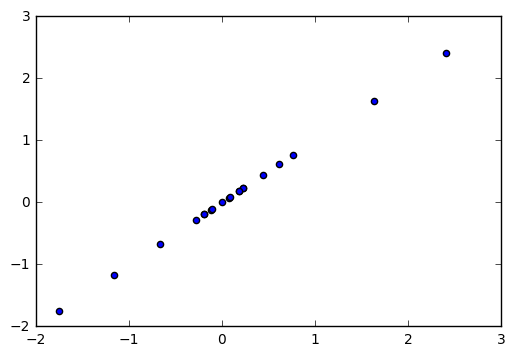

In [17]:
assert np.allclose(est.fit_.x, b_est)
plt.scatter(est.fit_.x, b_est)

## Gaussian Model

In [2]:
n, p = 1000, 10
X = np.random.randn(n, p).astype(np.float32)
b_act = np.random.randn(p).astype(np.float32)
y = np.dot(X, b_act).astype(np.float32)
X.shape, b_act.shape, y.shape

((1000, 10), (10,), (1000,))

In [3]:
from tensorflow.contrib.opt import ScipyOptimizerInterface
from tensorflow.contrib.distributions import Normal
tf.reset_default_graph()

b = tf.Variable(tf.zeros(p), 'vector')

# Make vector norm as small as possible.
y_est = tf.squeeze(tf.matmul(X, tf.reshape(b, [-1, 1])))
y_dist = Normal(y_est, tf.ones(len(y), dtype=tf.float32))
loss = -1 * tf.reduce_sum(y_dist.log_prob(y))

print(y_est)
print(loss)

# Ensure the vector's y component is = 1.
#equalities = [b[0] - 1.]
#equalities = [b[0] - 3]
equalities = []
# Ensure the vector's x component is >= 1.
#inequalities = [b[2] - b[1]]
# inequalities = [
#     b[0] - b[1]
# ]
inequalities = []

# Our default SciPy optimization algorithm, L-BFGS-B, does not support
# general constraints. Thus we use SLSQP instead.
optimizer = ScipyOptimizerInterface(
    loss, equalities=equalities, inequalities=inequalities, method='SLSQP', options=dict(maxiter=1000))

Tensor("Squeeze:0", shape=(1000,), dtype=float32)
Tensor("mul:0", shape=(), dtype=float32)


In [4]:
init = tf.global_variables_initializer()
    
with tf.Session() as session:
    session.run(init)
    
    args = optimizer.minimize(session)
    b_est = session.run(b)


in2
in


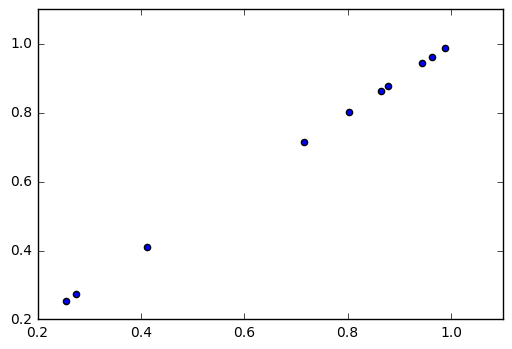

In [11]:
%matplotlib inline
plt.scatter(b_act, b_est)

## Beta Model

In [47]:
from scipy.stats.distributions import beta as beta_dist
n, p = 1000, 5
X = np.random.randn(n, p).astype(np.float32)
b_act = np.random.randn(p).astype(np.float32)
y = np.log(1 + np.exp(np.dot(X, b_act)))
print(pd.Series(y).describe())
beta = 1
y = np.array([beta_dist.rvs(alpha, beta, size=1)[0] for alpha in y]).astype(np.float32)
print(pd.Series(y).describe())
X.shape, b_act.shape, y.shape

count    1000.000000
mean        0.958076
std         1.041133
min         0.002656
25%         0.220767
50%         0.566529
75%         1.377312
max         7.597345
dtype: float64
count    1000.000000
mean        0.388304
std         0.341893
min         0.000000
25%         0.022294
50%         0.352688
75%         0.708736
max         0.998421
dtype: float64


((1000, 5), (5,), (1000,))

In [48]:
from tensorflow.contrib.distributions import Beta
import logging
logger = logging.getLogger('nb')
def tf_print(t, transform=None):
    def log_value(x):
        #logger.info('{} - {}'.format(t.name, x if transform is None else transform(x)))
        print('{} - {}'.format(t.name, x if transform is None else transform(x)))
        return x
    log_op = tf.py_func(log_value, [t], [t.dtype], name=t.name.split(':')[0])[0]
    with tf.control_dependencies([log_op]):
        r = tf.identity(t)
    return r

In [50]:
from tensorflow.contrib.opt import ScipyOptimizerInterface
from tensorflow.contrib.distributions import Beta
tf.reset_default_graph()

b = tf.Variable(tf.random_normal([p,]), 'vector')

# Make vector norm as small as possible.
n_samp = len(y)
y_est = tf.nn.sigmoid(tf.squeeze(tf.matmul(X, tf.reshape(b, [-1, 1]))))
y_est = (y_est * (n_samp - 1) + .5) / n_samp
y_est = tf_print(y_est)
y_dist = Beta(y_est / (1 - y_est), tf.ones(len(y), dtype=tf.float32))

y_trans = (y * (n_samp - 1) + .5) / n_samp
y_prob = y_dist.log_prob(y_trans)
loss = tf.reduce_sum(y_prob) #- tf.sqrt(tf.reduce_sum(tf.square(b)))
loss = loss * -1

print(y_est)
print(loss)

# Ensure the vector's y component is = 1.
#equalities = [b[0] - 1.]
#equalities = [b[0] - 3]
equalities = []
# Ensure the vector's x component is >= 1.
#inequalities = [b[2] - b[1]]
# inequalities = [
#     b[0] - b[1]
# ]
inequalities = []

# Our default SciPy optimization algorithm, L-BFGS-B, does not support
# general constraints. Thus we use SLSQP instead.
optimizer = ScipyOptimizerInterface(
    loss, equalities=equalities, inequalities=inequalities, method='SLSQP', options=dict(maxiter=10))

init = tf.global_variables_initializer()
    
with tf.Session() as session:
    session.run(init)
    
    args = optimizer.minimize(session)
    b_est = session.run(b)


Tensor("Identity:0", shape=(1000,), dtype=float32)
Tensor("mul_1:0", shape=(), dtype=float32)
truediv:0 - [ 0.73875588  0.49925157  0.59282058  0.28235352  0.15574139  0.07137024
  0.66435397  0.25167257  0.81781417  0.61203903  0.17221197  0.17228758
  0.52744693  0.52859962  0.3614088   0.76898152  0.76907045  0.81947488
  0.25147435  0.14414665  0.36986369  0.73858356  0.92731041  0.23145469
  0.46869633  0.18951938  0.38140008  0.27202713  0.43865082  0.57426095
  0.68349057  0.69613081  0.8070032   0.41407087  0.47441295  0.17179695
  0.54645538  0.77058363  0.67606688  0.48141369  0.85604042  0.72900867
  0.2484449   0.59954596  0.60115659  0.61571854  0.43912828  0.51622206
  0.50491869  0.46598396  0.79515392  0.50383073  0.09958179  0.1057687
  0.66833991  0.3549203   0.73947549  0.66340733  0.34000844  0.58016944
  0.40961602  0.26327106  0.64401656  0.80975622  0.13882169  0.49937993
  0.1139852   0.65326887  0.91701561  0.308974    0.48562372  0.16663516
  0.59575188  0.561

In [34]:
pd.Series(y_trans).describe()

count    1000.000000
mean        0.414449
std         0.363368
min         0.000500
25%         0.010211
50%         0.369921
75%         0.777281
max         0.998858
dtype: float64

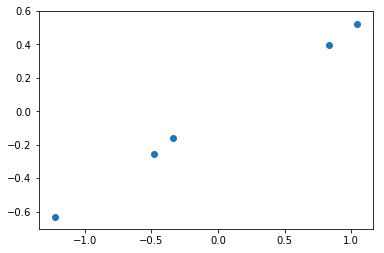

In [51]:
%matplotlib inline
plt.scatter(b_act, b_est)